## Step 1: Importing Libraries and Data

### 1.1 Import Libraries

In [257]:
#Importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Supress Warning 
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import precision_score , recall_score , f1_score , precision_recall_curve

#statmodel libraries 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Step 1.2 Reading and Understanding dataset

In [258]:
# importing Leads dataset and checking it
data = pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [259]:
data.shape

(9240, 37)

note : the dataset has 9240 rows and 37 columns

## Step 2: Data Understanding and Inspection

In [260]:
# checking  info of datframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [261]:
# describing dataFrame
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [262]:
# checking for duplicate rows 
data.duplicated().sum()

0

## Step 3: Data Cleaning

### 3.1 Treatment for 'Select' values

In [263]:
# replacing value null where value is select in coulmns
data = data.replace('Select' , np.nan)

In [264]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in data.columns if len(data[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


### 3.2 Handling Missing Values

In [265]:
# checking null values in terms of percentage
( round((data.isna().sum()/ len(data.index))*100 , 2) ).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### note : we will drop the columns having more than 40% NA values.

In [266]:
col_drop_list = ['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Activity Index','Asymmetrique Profile Index']

In [267]:
data.drop(labels=col_drop_list , axis=1 , inplace=True)

In [268]:
data.shape

(9240, 30)

In [269]:
# checking again 
(round((data.isna().mean() *100) , 2)).sort_values(ascending= False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [270]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [271]:
cat_col = data.select_dtypes(include=['object']).columns.tolist()
cat_col

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [272]:
handle_col_list = ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']
for i in handle_col_list:
    per = data[i].value_counts(normalize=True)*100
    print(per)
    print('---'*40)

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Mana

Dropping the following columns

'City',
'Tags',
'Country',
'What matters most to you in choosing a course'

In [273]:
data.drop(['City','Tags','Country','What matters most to you in choosing a course'] , axis= 1 , inplace=True)

In [274]:
data.shape

(9240, 26)

In [275]:
# checking again
(round((data.isna().mean() *100) , 2)).sort_values(ascending= False)

Specialization                              36.58
What is your current occupation             29.11
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
X Education Forums                           0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
Search                                       0.00
Newspaper Article                            0.00
Magazine                                     0.00
Lead Number                                  0.00


#### Imputing the following columns

'Specialization',
'Lead Source',
'Last Activity',
'What is your current occupation'

In [276]:
missing_value = {'Specialization' :'other' , 'What is your current occupation':'Unemployed',
                 'Last Activity':'Email Opened' , 'Lead Source':'Google'}
data = data.fillna(value=missing_value)


In [277]:
(round((data.isna().mean() *100) , 2)).sort_values(ascending= False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

### 3.2.3 Columns with Numerical Data

In [278]:
data[['TotalVisits', 'Page Views Per Visit']].value_counts(normalize=True)

TotalVisits  Page Views Per Visit
0.0          0.00                    0.240470
2.0          2.00                    0.161156
3.0          3.00                    0.109305
4.0          4.00                    0.090739
5.0          5.00                    0.052620
                                       ...   
20.0         10.00                   0.000110
21.0         2.63                    0.000110
16.0         2.00                    0.000110
22.0         1.38                    0.000110
251.0        1.48                    0.000110
Name: proportion, Length: 171, dtype: float64

#### NOTE: Missing values in 'TotalVisits', 'Page Views Per Visit' can be imputed with mode.

In [279]:
# print(data['Page Views Per Visit'].mode()[0])
# print(data['TotalVisits'].mode()[0])


In [280]:
data['TotalVisits'].fillna(data['TotalVisits'].mode()[0] , inplace=True)
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].mode()[0] , inplace=True)

In [281]:
(round((data.isna().mean() *100) , 2)).sort_values(ascending= False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### 3.3 Removing Unwanted Columns

### 3.3.1 Handling columns with only one unique value

In [282]:
#check for columns with one unique value, count and freq is same
data.describe(include=object)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,...,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,...,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,other,Unemployed,No,No,...,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,...,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


note : below columns have only one unique value 

'I agree to pay the amount through cheque',
'Get updates on DM Content',
'Update me on Supply Chain Content',
'Receive More Updates About Our Courses',
'Magazine'

So dropping these columns

In [283]:
data.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
            'Receive More Updates About Our Courses','Magazine'] , axis=1 , inplace=True)

In [284]:
data.shape

(9240, 21)

### 3.3.2 removing columns which not useful for modeling

NOTE: Columns such as:

'Prospect ID',
'Lead Number',
'Last Notable Activity'

In [285]:
data.drop(['Prospect ID', 'Lead Number', 'Last Notable Activity'] , axis=1 , inplace=True)

In [286]:
data.shape

(9240, 18)

In [287]:
# checiing the percentage of missing values in each row,output in descending order so high value will come on top

round( data.isna().mean(axis=1)*100 ,2).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

In [288]:
#### NOTE: No missing values in rows

In [289]:
data.describe(include=object)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,21,2,2,17,19,6,2,2,2,2,2,2,2
top,Landing Page Submission,Google,No,No,Email Opened,other,Unemployed,No,No,No,No,No,No,No
freq,4886,2904,8506,9238,3540,3380,8290,9226,9238,9239,9239,9236,9233,6352


#### Note : some columns have frequency is close to overall length of data do dropping that columns also 

NOTE: Following columns have data which is highly skewed :

'Do Not Call',
'Search',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations'.

In [290]:
data.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [291]:
data.shape

(9240, 11)

#### Data is cleaned 
now need to standarize the data 

### 3.5 Outlier Analysis
#### For Numerical Columns

In [292]:
def Check_Outliers(numcollist):
    a=1
    plt.figure(figsize = [20,10])
    for i in numcollist:
        plt.subplot(2,2,a)
        sns.boxplot(y=data[i])
        a+=1
        plt.suptitle("Checking Outliers using Boxplot" , fontsize=20 , color='red')
        plt.title(i , fontsize=15 , color='green')

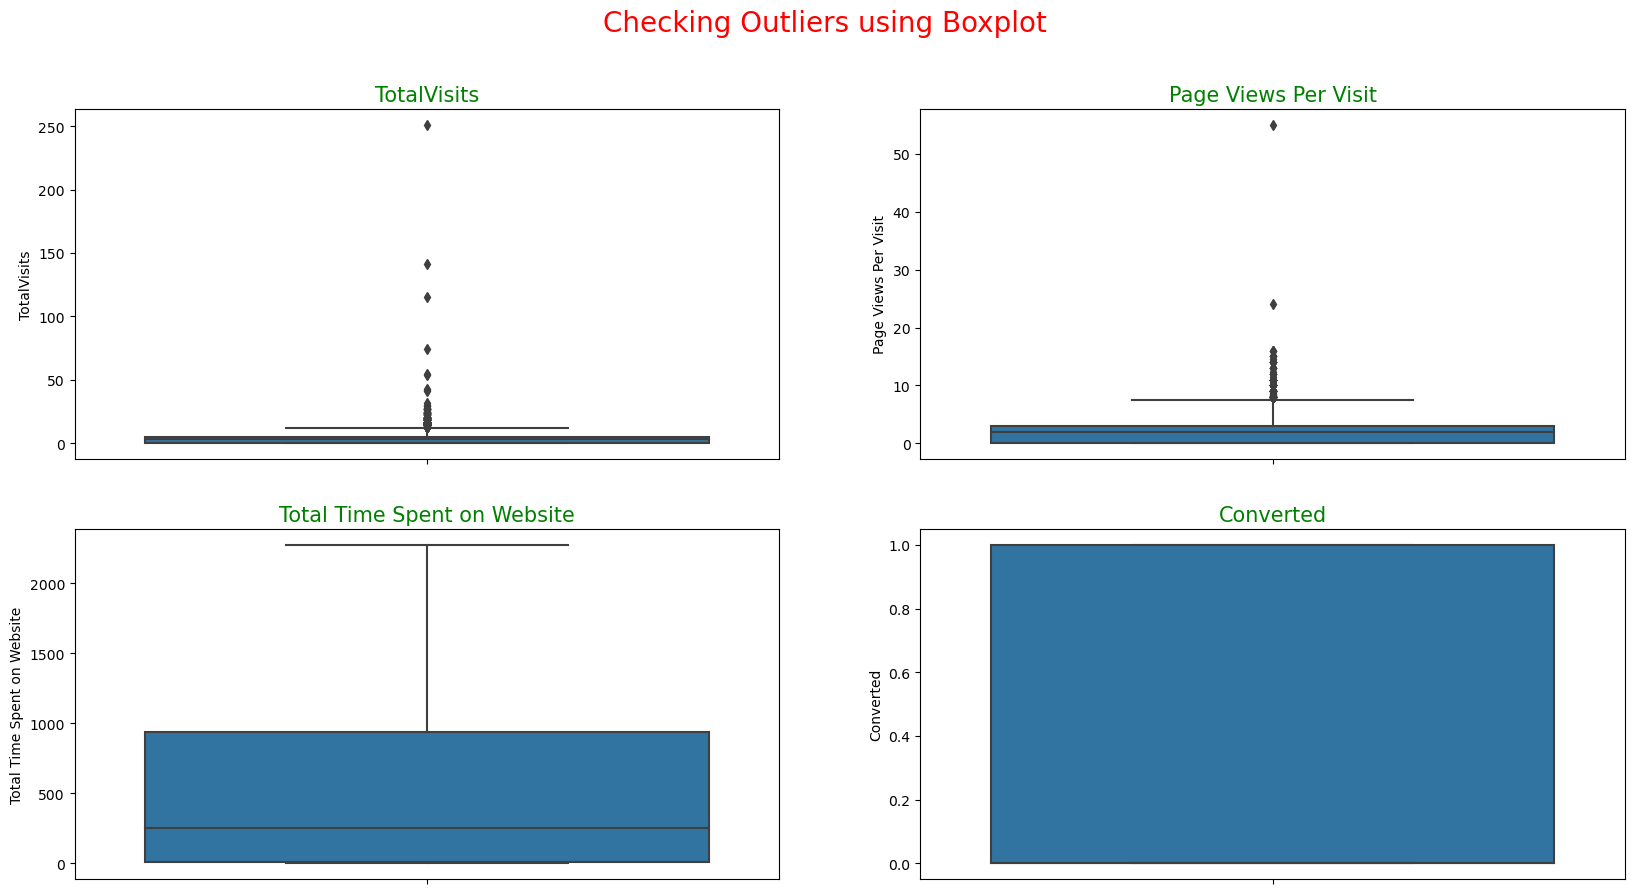

In [293]:
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website", "Converted"]
Check_Outliers(num_cols)

Note :

"TotalVisits","Page Views Per Visit":Both these variables contain outliers as can be seen in the boxplot So, These outliers needs to be treated for these variables

In [294]:
# chceking before removing outliers
data.describe( percentiles=[.25 ,.5 ,.75, .95 , .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000
max,1.000000,251.000000,2272.000000,55.000000


#### Defining UDF to treat outliers via capping and flooring

In [295]:
def Outlier_Handling(df , cols):
    for i in cols:
        q1 = df[i].describe()['25%']
        q3 = df[i].describe()['75%']
        IQR = q3 - q1
        
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        
        #capping upper_bound
        df[i] = np.where( df[i] > upper_bound , upper_bound , df[i])
        
        #flooring lower_bound
        df[i] = np.where( df[i] < lower_bound , lower_bound , df[i])
        

In [296]:
#outlier treatment for columns

capping_cols = ["TotalVisits","Page Views Per Visit"]

Outlier_Handling(data , capping_cols)


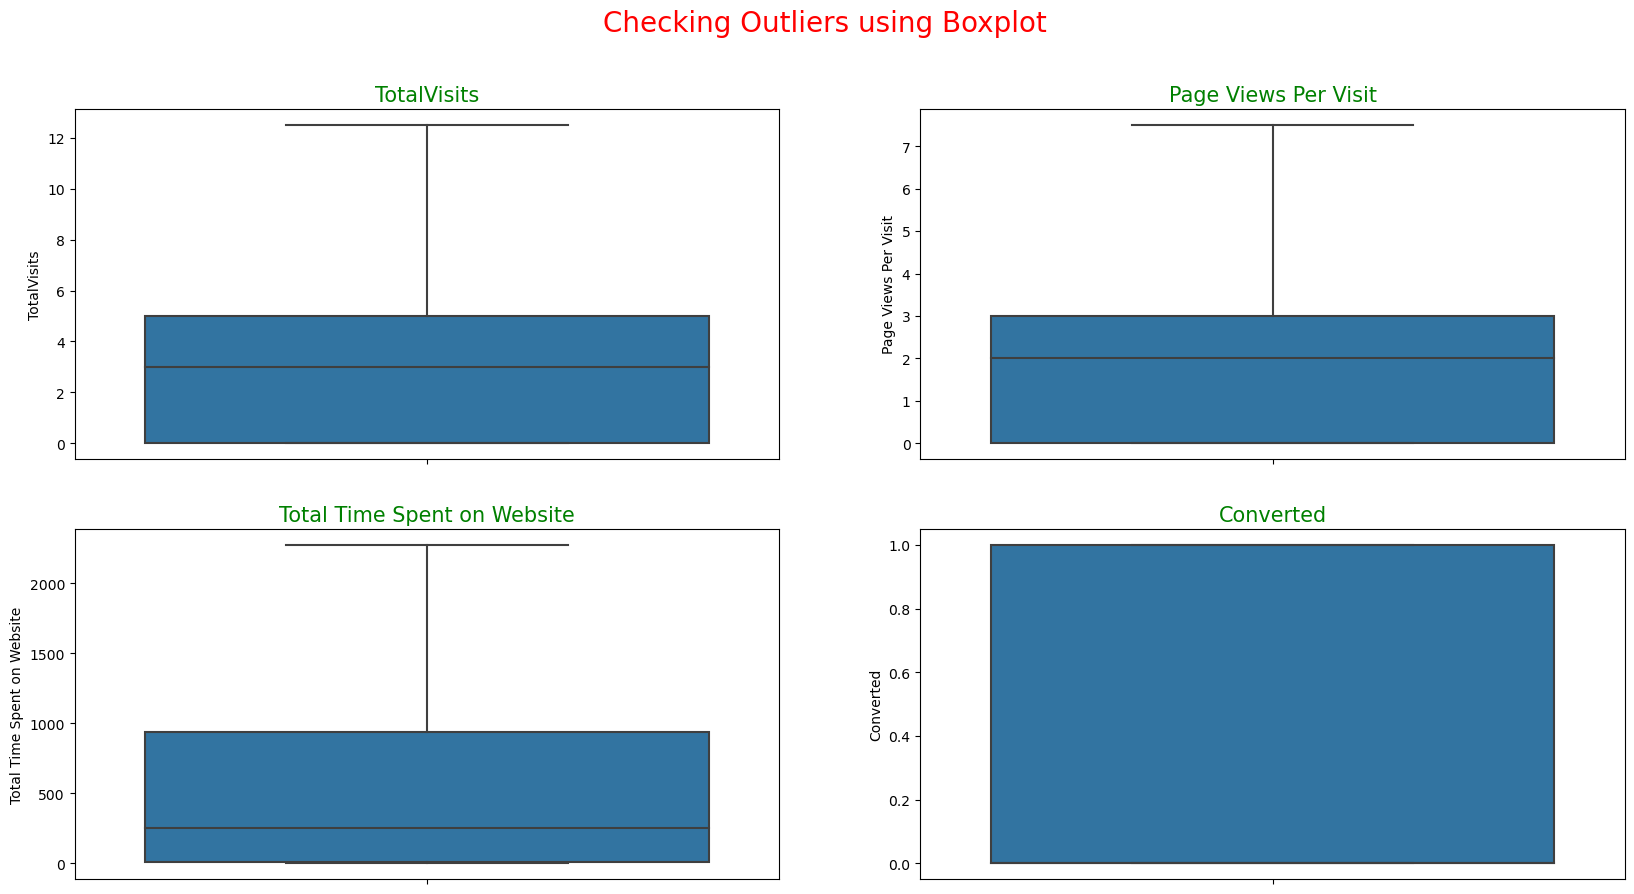

In [297]:
# Checking Boxplot after Outlier Treatment

Check_Outliers(num_cols)

In [298]:
# after outlier treatment detailed percentile values
data.describe(percentiles=[.10,.25,.50,.75,.95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,12.500000,1840.610000,7.500000


### 3.6 Fixing Invalid values & Standardising Data in columns
- Checking if entries in data are in correct format or not , casing styles (UPPER,lower)
- Checking data types of columns

#### Categorical Variable 

In [299]:
cat_col = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
           "What is your current occupation","A free copy of Mastering The Interview"]

for i in cat_col :
    per = data[i].value_counts(normalize=True)*100
    print(per)
    
    print("--"*40)

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: f

NOTE:

- We've noticed that some categories/levels in the "Lead Score" and "Last Activity" columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under "Others". That way, we can keep things neat and tidy.

- Also we can see "Google" & "google" are same in "Lead Source", so we will standardise the case.

### 3.6.1 Grouping Low frequency values

In [300]:
data['Lead Source'] = data['Lead Source'].replace('google' , 'Google')

data['Lead Source'] = data['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"], "Others")


data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')


In [301]:
# value_counts percentage after replace
print(data["Lead Source"].value_counts(normalize=True)*100)
print('--'*25)
print(data["Last Activity"].value_counts(normalize=True)*100)

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64
--------------------------------------------------
Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64


In [302]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
# and "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"

data.rename(columns={'A free copy of Mastering The Interview':'Free_copy' , 
                     'What is your current occupation':'Current_occupation'} , inplace=True)

NOTE:

"Do Not Email" & "Free_copy" both are binary categorical columns lets map both of them yes/no to 1/0

### 3.6.2 Mapping Binary categorical variables

In [303]:
data['Do Not Email'] = data['Do Not Email'].apply(lambda x : 1 if x=='Yes' else 0)

data['Free_copy'] = data['Free_copy'].apply(lambda x : 1 if x=='Yes' else 0)

### 3.6.3 Checking Data-types of variables

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


NOTE: The data types appear to be suitable and no modifications are necessary.

## Step 4: Data Analysis (EDA)

### 4.1  Univariate Analysis

### 4.1.1 Univariate Analysis for Categorical Variable

In [305]:
categorical_columns = data.columns[data.dtypes=='object']
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Current_occupation'],
      dtype='object')

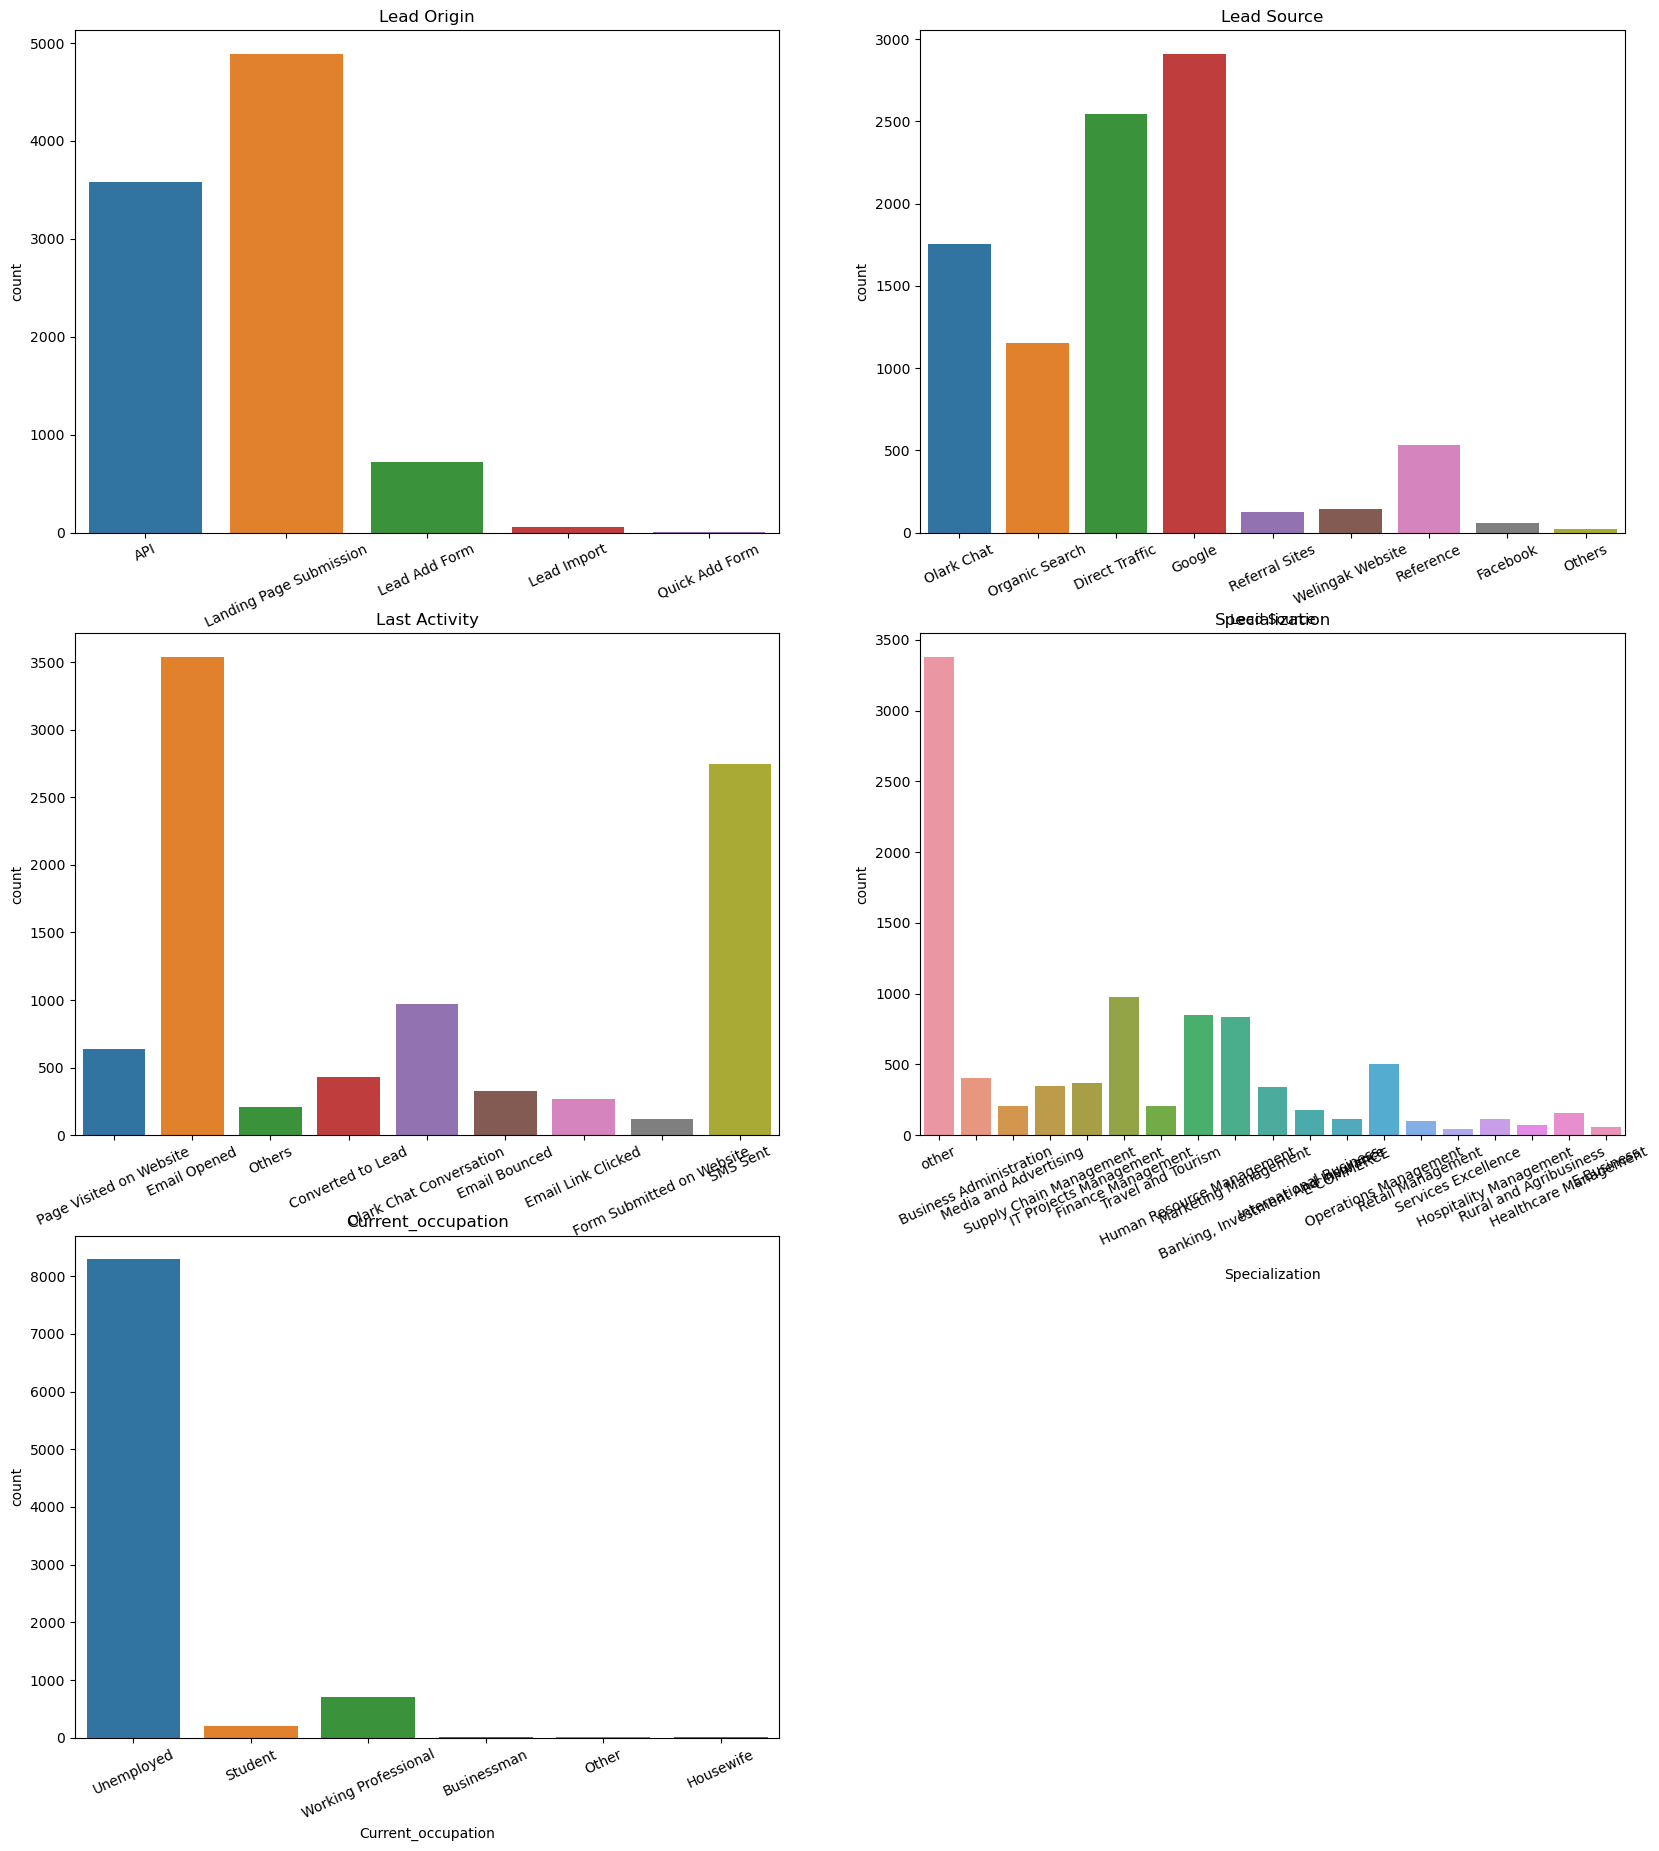

In [306]:
c=1 
plt.figure(figsize=[20,30])
for i in categorical_columns :
    plt.subplot(4,2,c)
    sns.countplot(data= data , x=i)
    plt.title(i)
    plt.xticks(rotation=25)
    c+=1

### 4.1.2 Univariate analysis for numercial variable

In [307]:
numerical_columns = data.columns[data.dtypes!='object']
numerical_columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Free_copy'],
      dtype='object')

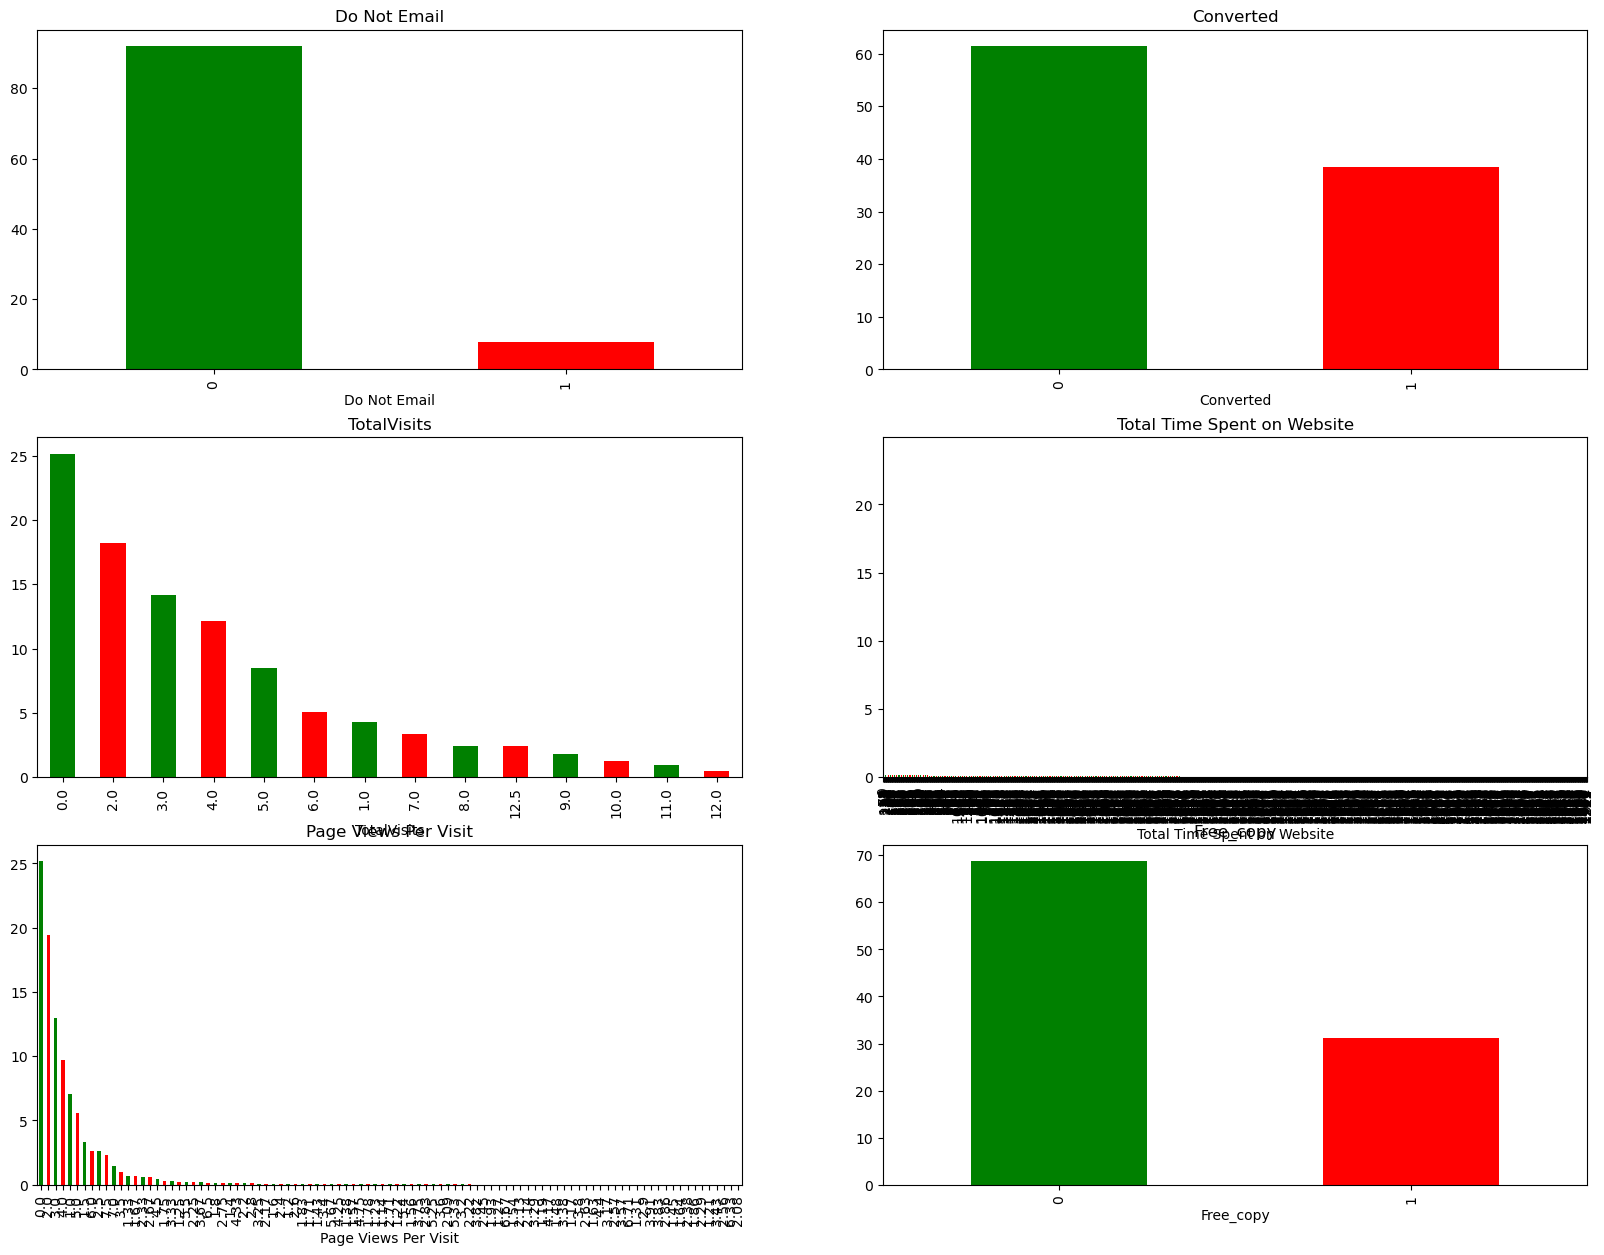

In [308]:
c =1 
plt.figure(figsize=[20,15])
for i in numerical_columns :
    plt.subplot(3,2,c)
#     sns.boxplot(data[i])
    (data[i].value_counts(normalize=True)*100).plot.bar(color =['Green','Red'])
    plt.title(i)
    c+=1

#### Insights :
    - Lead origin : 'landing page submission identified around 52% and 'API' identified 39% 
    - Current_occupation : it seems that 90% of the customer are unemployed.
    - Do Not Email : almost 90% people opted that they don't want to be emailed about the course.
    - Lead source  : arounf 60% Lead source is from Google and Direct traffic combine
    - Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities
    - Conversion rate: it is around 39% meaning 39% pople have converted to leads, while 61% of the people are didn't converted.
   

### 4.2 Bivariate Analysis

### 4.2.1 Bivariate Analysis for categorical variable

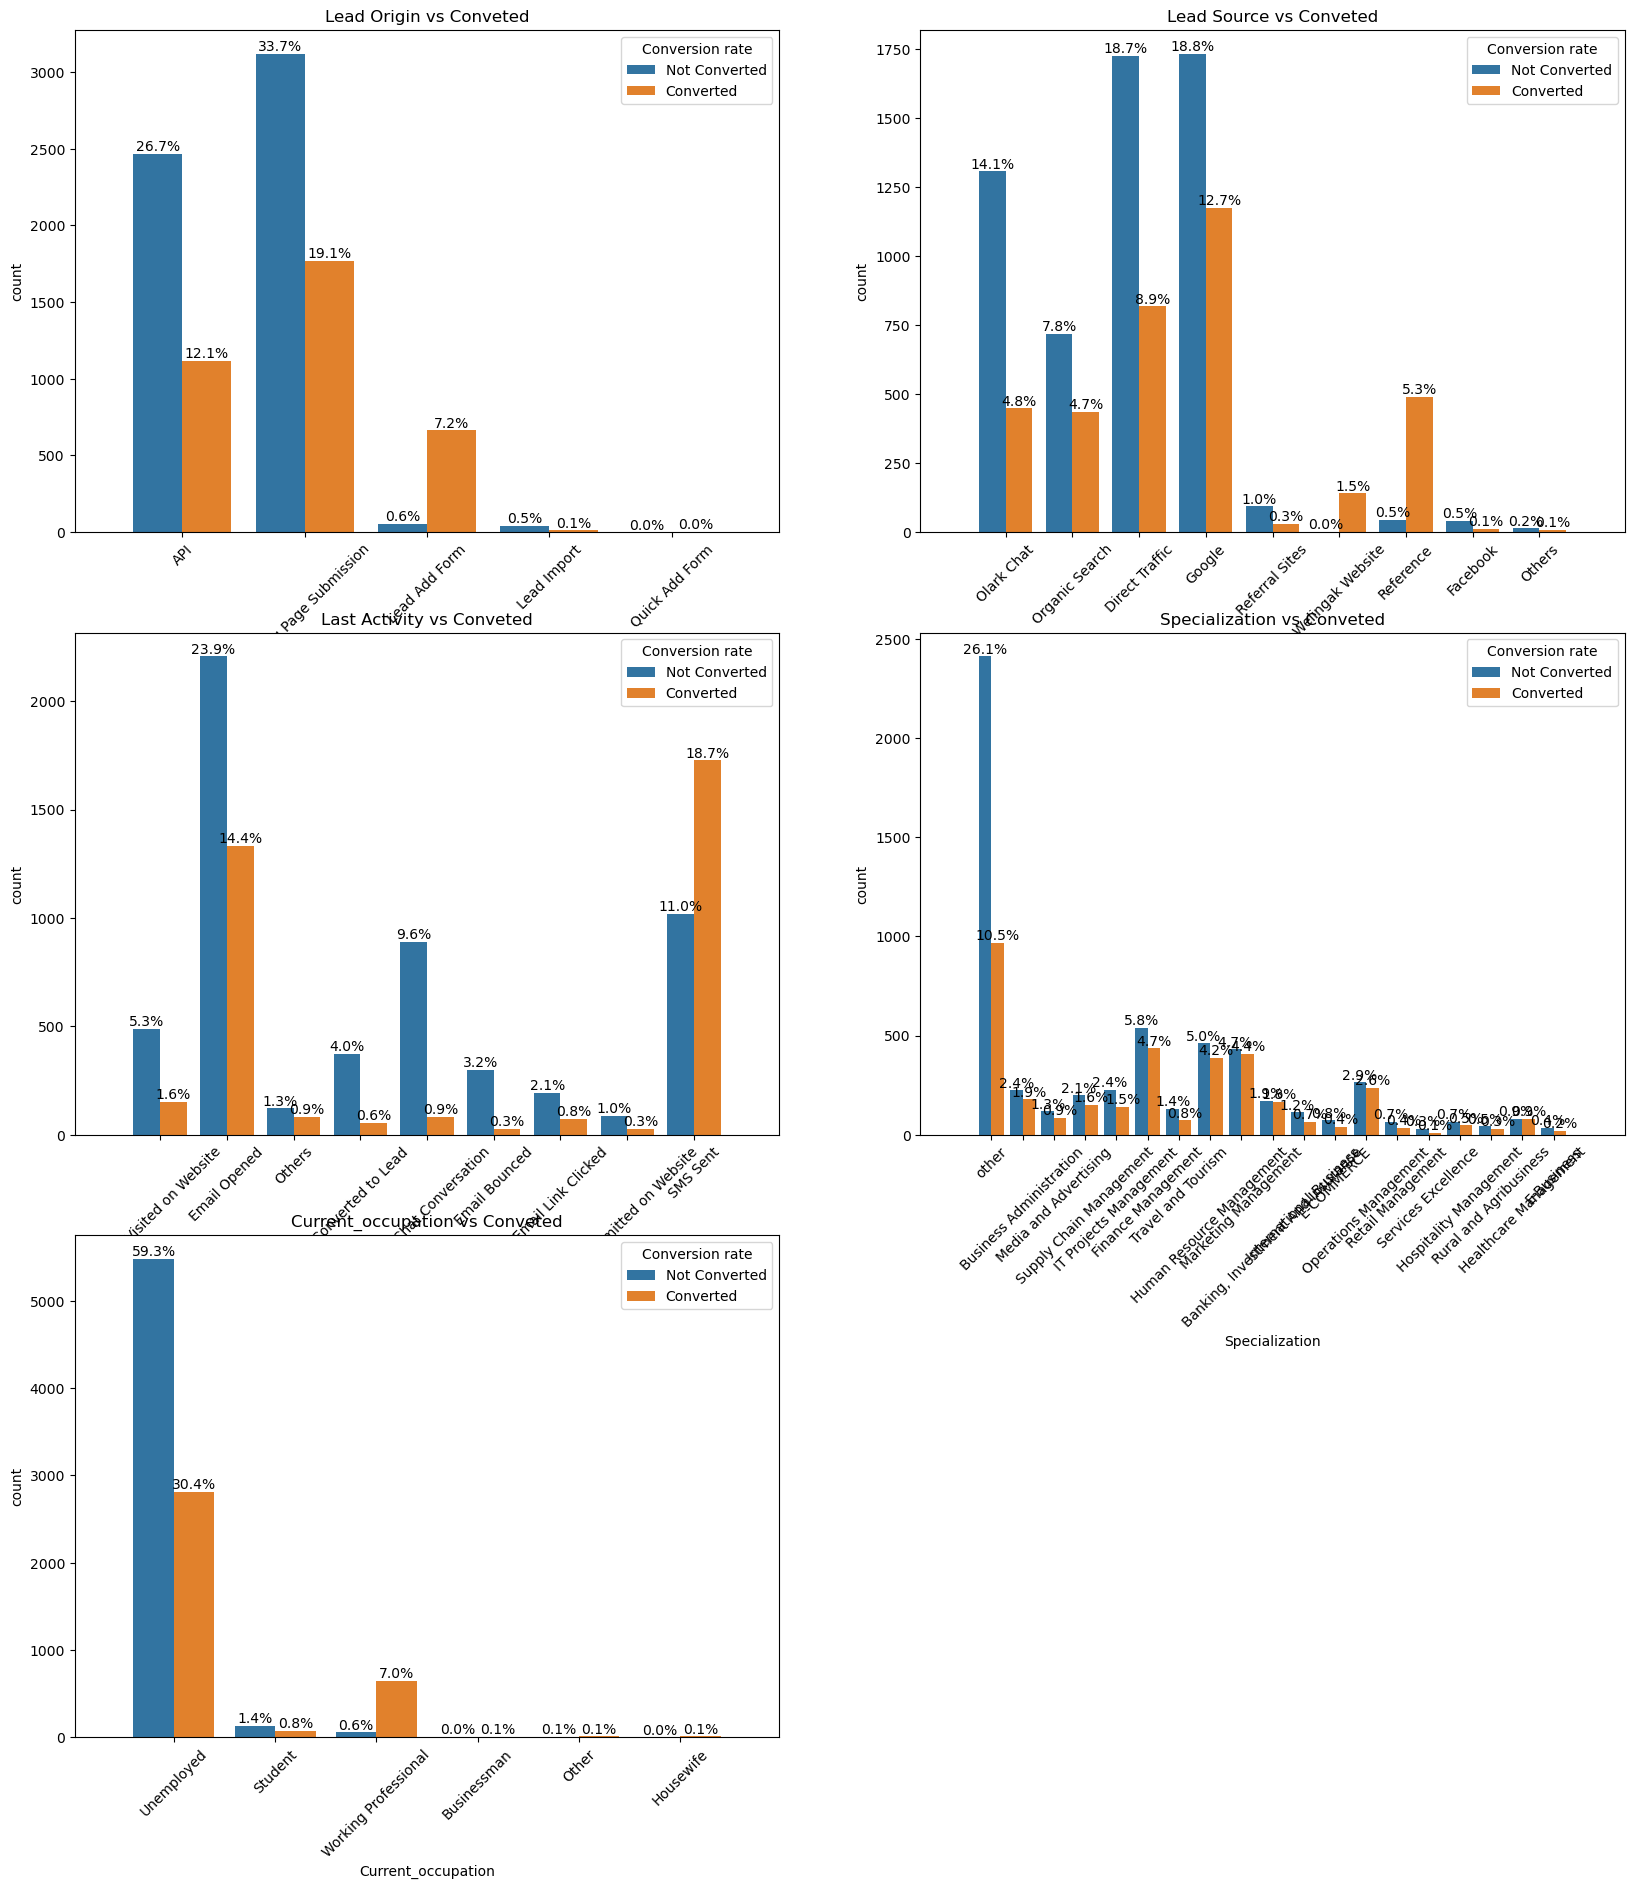

In [309]:
c=1
plt.figure(figsize=[20,30])
for i in categorical_columns :
    plt.subplot(4,2,c)
    ax = sns.countplot(x = i , hue='Converted' , data= data)
    total = data[i].count()
    ax.bar_label(ax.containers[0] , fmt = lambda x: f'{(x/total)*100:0.1f}%')
    ax.bar_label(ax.containers[1] , fmt = lambda x: f'{(x/total)*100:0.1f}%')
    ax.margins(x=0.1)
    plt.title("{} vs Conveted".format(i))
    plt.legend(labels = ['Not Converted','Converted'] , title='Conversion rate')
    plt.xticks(rotation=45)
    c+=1

#### Insights :
    - Lead Origin : around 52% all leads originated from "Landing Page Submission" where 19% are converted.
                    Also around 395 leads originated from "API" where 12% are converted.
                    
    - Lead Source : conversion rate is high in preferance other than that around 13% and 9% are converted from google and
    direct traffic respectively.
    
    - Do Not Email : from 8% people resopned to the email where 1.3% only converted.
    
    - Last_Activity : via 'sms sent' 18.7% people are converted out of 30% and via 'email opened' only 14% are converted out of 38%
    
    - Specialization: Marketing Managemt,HR Management,Finance Management shows good contribution.
    
    - Current_occupation: Around 90% of the customers are Unemployed from 30.5% only converted, 
                          but out of 7.6% working professional 7% are converted need to focus on these area.

### 4.2.2 Bivariate Analysis for Numerical Variable :


In [310]:
numerical_columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Free_copy'],
      dtype='object')

In [311]:
# Scatter Plot
# plt.figure(figsize=(10,8))
# sns.pairplot(data=data , vars=numerical_columns[1:] , hue='Converted')
# plt.show()

<Axes: >

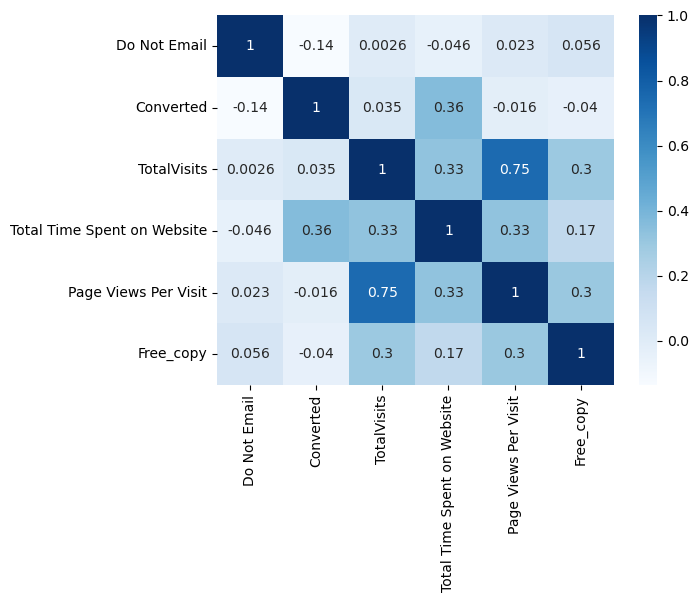

In [312]:
# Heatmap to show corrleation betwwe numerical column 
sns.heatmap(data= data[numerical_columns].corr() , cmap='Blues', annot=True)

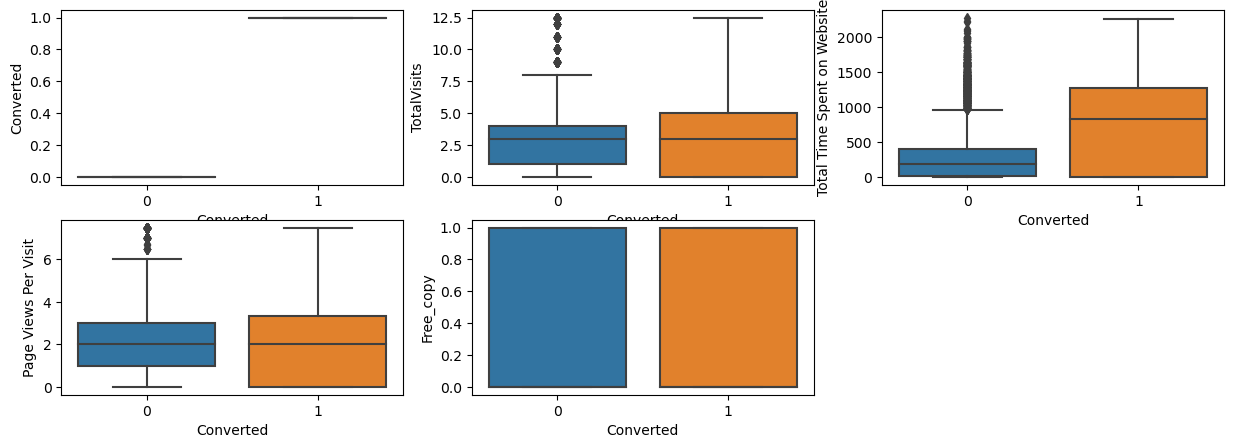

In [313]:
# Boxplot with Converted
plt.figure(figsize=(15,5))
c =1
for i in numerical_columns[1:]:
    plt.subplot(2,3,c)
    sns.boxplot(data=data , x='Converted' , y=i)
    c+=1

#### Insights:

Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

## Step 5 : Data Preparation

### 5.1 Dummy Variables
   - Creating multi level dummmy variables (one-hot encoded) for categorical variables.

##### Binary level categorical columns are already mapped to 1/0 in previous steps, So directly creating dummy variable

In [314]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,other,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,other,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,other,Unemployed,0


In [315]:
data.shape

(9240, 11)

In [316]:
dummy = pd.get_dummies(data[['Lead Origin','Lead Source' ,'Last Activity' , 'Specialization','Current_occupation']] ,
                       dtype=int , drop_first=True)

data = pd.concat([data , dummy] , axis=1)

In [317]:
data.shape

(9240, 54)

In [318]:
data.drop(['Lead Origin','Lead Source' ,'Last Activity' , 'Specialization','Current_occupation'] , axis=1 , inplace=True)

In [319]:
data.shape

(9240, 49)

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   int32  
 7   Lead Origin_Lead Add Form                 9240 non-null   int32  
 8   Lead Origin_Lead Import                   9240 non-null   int32  
 9   Lead Origin_Quick Add Form                9240 non-null   int32  
 10  Lead Source_Facebook                

## Step 6: Test-Train Split

In [321]:
# Creating predictor data for X
X = data.drop('Converted' , axis=1)

# Creating predictor data for y
y = data['Converted']

In [322]:
#Checking shape of X and y
print(X.shape)
print(y.shape)

(9240, 48)
(9240,)


In [323]:
# Spitting the data into train-test split

X_train , X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , test_size=0.3 , random_state=100)

In [324]:
# checking shape for train n test data

print("X_train shape " , X_train.shape)
print("X_test shape " , X_test.shape)
print("y_train shape " , y_train.shape)
print("y_test shape " , y_test.shape)

X_train shape  (6468, 48)
X_test shape  (2772, 48)
y_train shape  (6468,)
y_test shape  (2772,)


## Step 7: Feature Scaling

In [325]:
# using Standard scalert for scaling 
scaler = StandardScaler()

In [326]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0,4.0,487,1.33,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3516,0,5.0,106,2.50,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8105,0,5.0,1230,5.00,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3934,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [327]:
num_cols_train = X_train.select_dtypes(include =['int64', 'float64']).columns
num_cols_train

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Free_copy'],
      dtype='object')

In [328]:
X_train[num_cols_train] = scaler.fit_transform(X_train[num_cols_train])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [329]:
#  checking LCR (lead conversion rate) of 'Converted' column as it is our target variable

LCR = sum(data['Converted'])/len(data['Converted'])*100
LCR

38.53896103896104

Note : We have 38.54 % Conversion rate

### 7.1 Looking for correlation

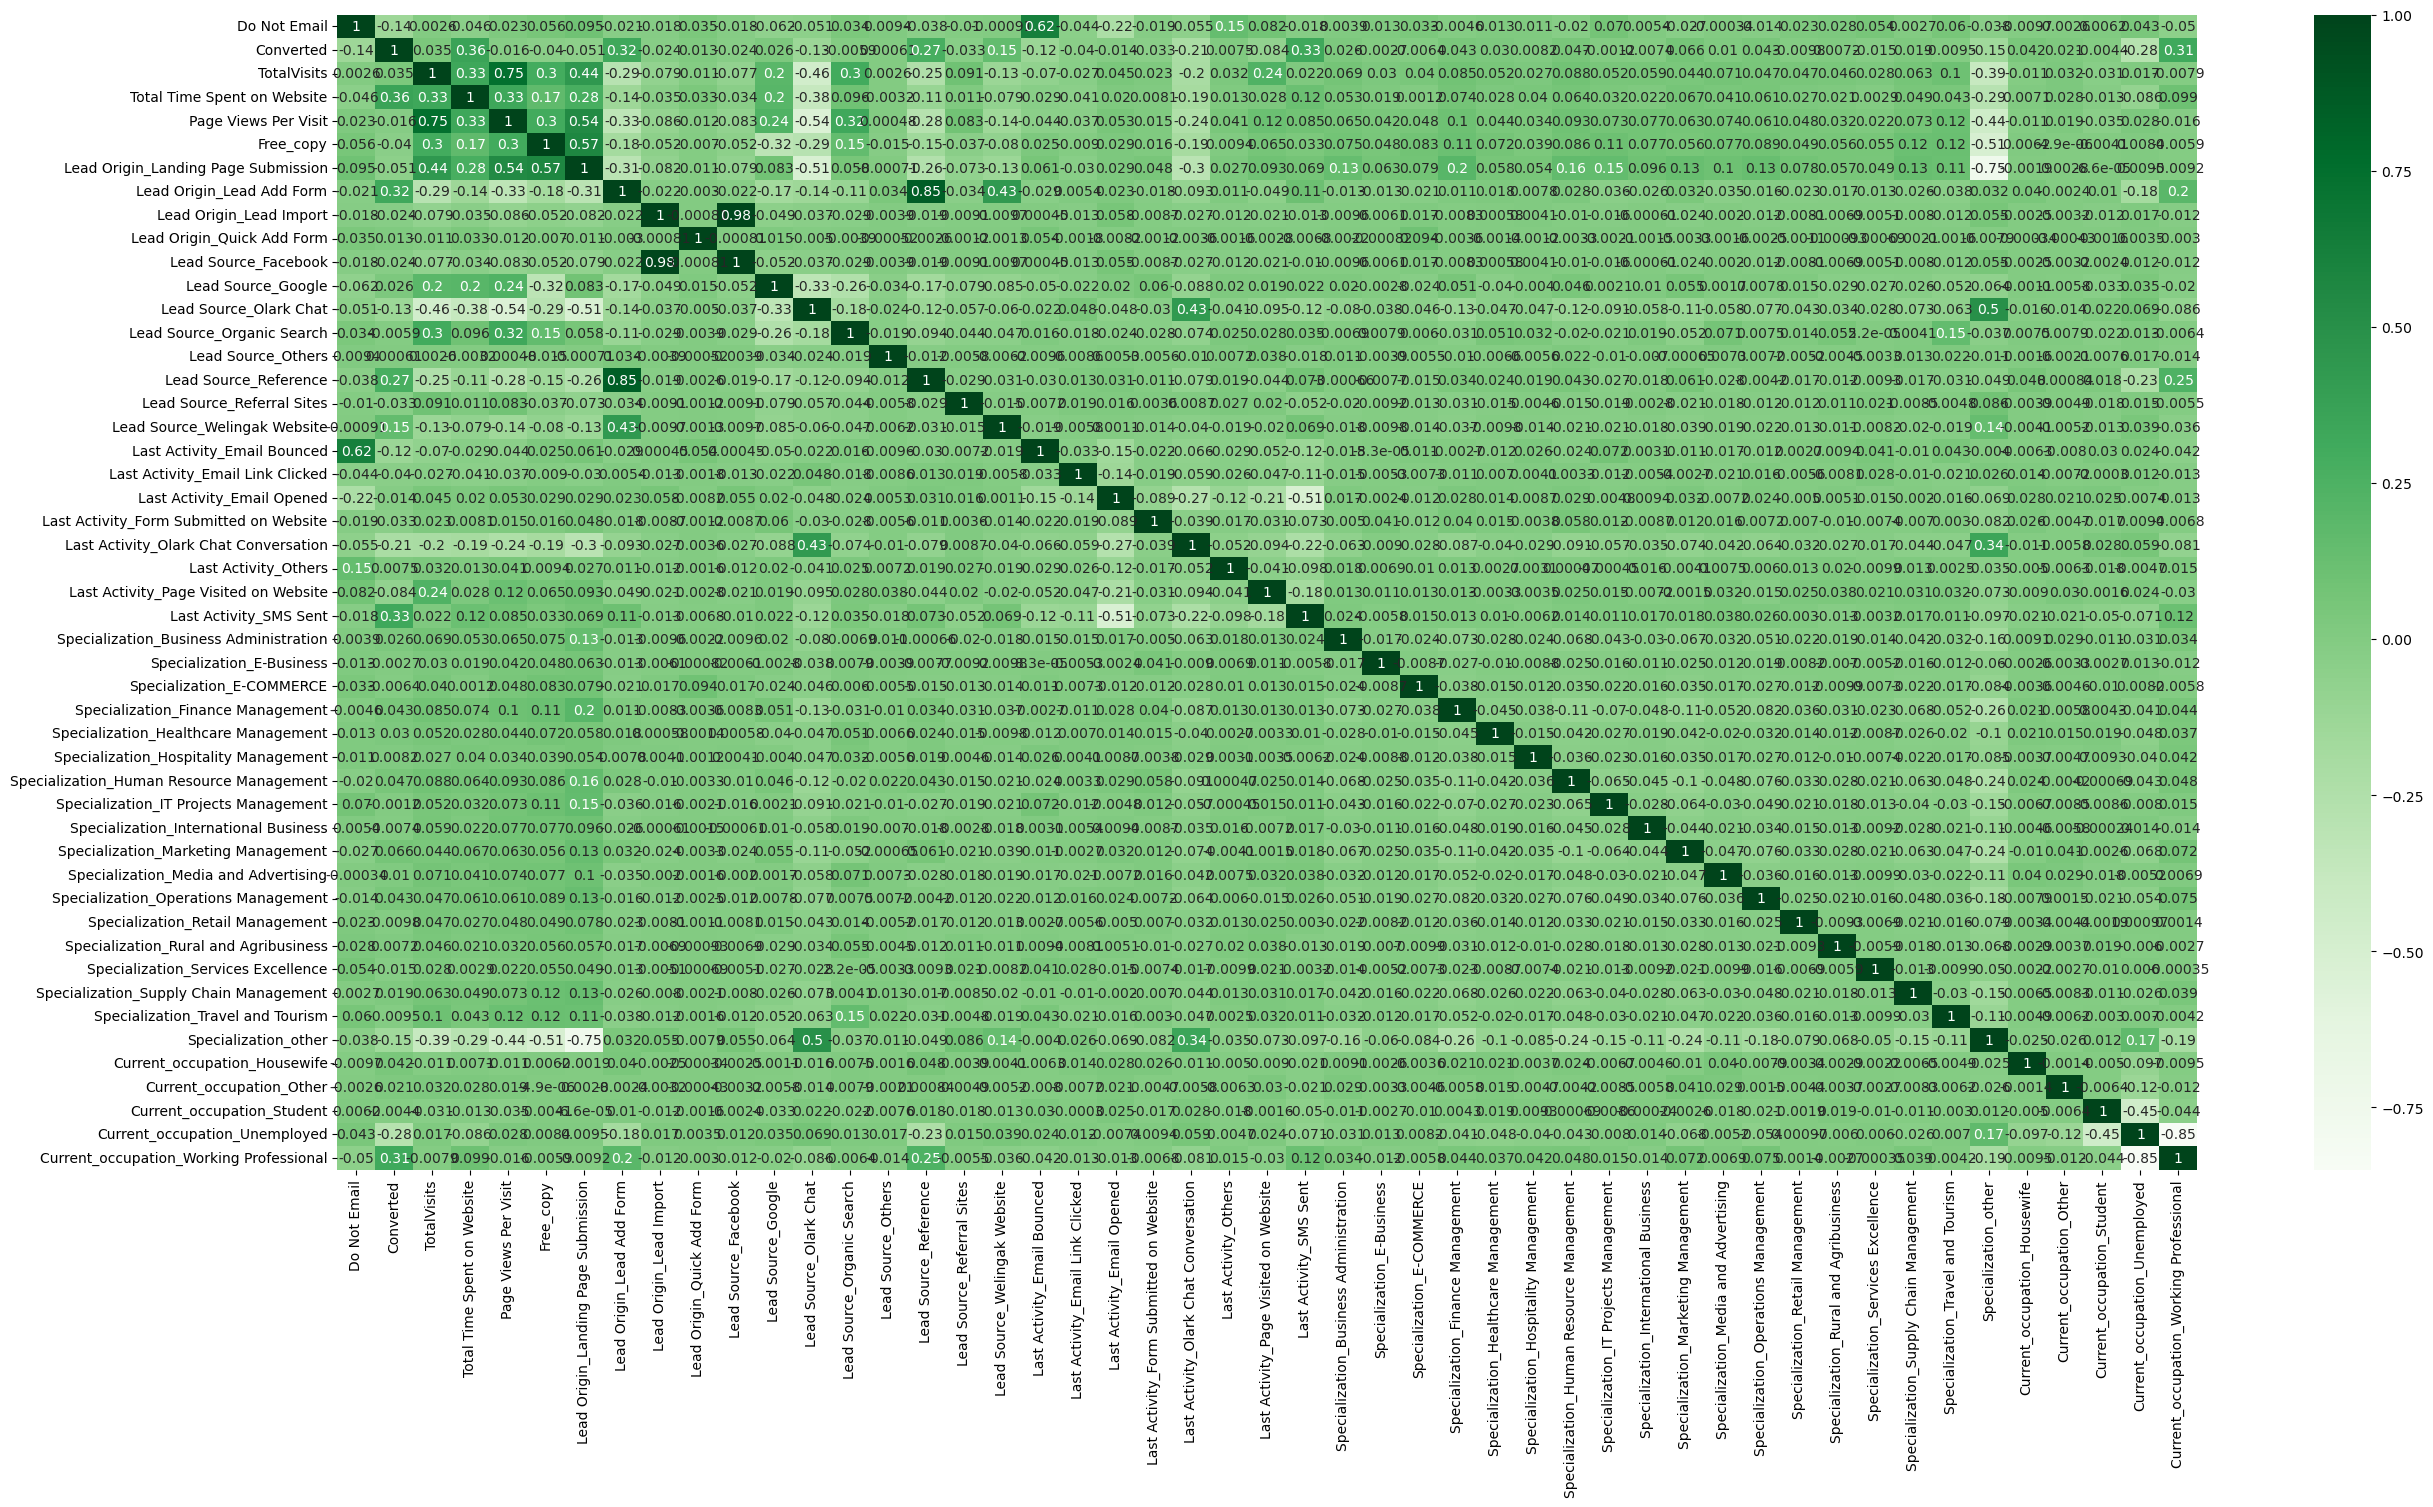

In [330]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr() , cmap='Greens' , annot=True)
plt.show()

note: for the analysis this chart is too big so we will take some columns and check on it.(The columns which suspected as highly correlated)

<Axes: >

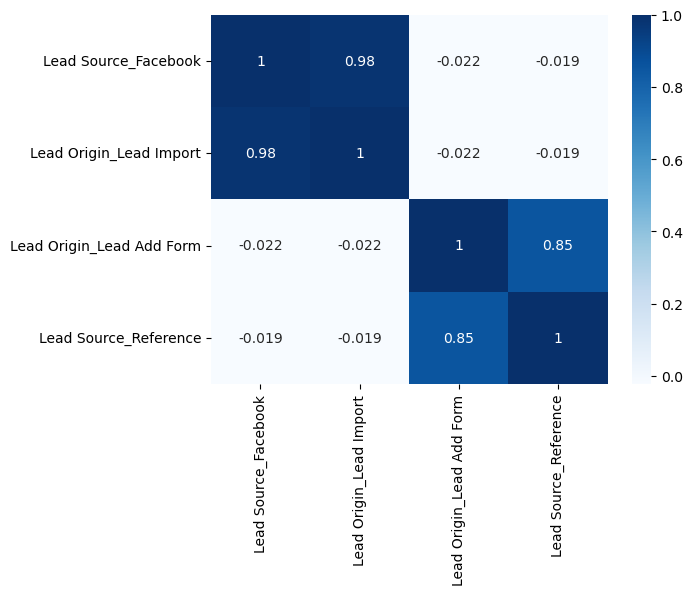

In [331]:
sns.heatmap(data[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr()
            , cmap='Blues' ,annot=True)

#### Note: These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'

In [332]:
X_train.drop(['Lead Origin_Lead Import' ,'Lead Origin_Lead Add Form'] , axis=1 , inplace=True)

X_test.drop(['Lead Origin_Lead Import' ,'Lead Origin_Lead Add Form'] , axis=1 , inplace=True)

In [333]:
print(X_train.shape)
print(X_test.shape)

(6468, 46)
(2772, 46)


## Step 8: Model Building

- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

### 8.1 Feature Selection Using RFE (Recursive Feature Elimination)

In [334]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg , n_features_to_select=15)
rfe = rfe.fit(X_train , y_train)

In [335]:
# checking list of output of RFE
list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [336]:
# instead of using as zip using this for more readablility

top15 = pd.DataFrame()
top15['feature'] = X_train.columns
top15['rfe_status'] = rfe.support_
top15['ranking'] = rfe.ranking_
top15.sort_values(by='ranking')

,feature,rfe_status,ranking
22,Last Activity_SMS Sent,True,1
41,Current_occupation_Housewife,True,1
40,Specialization_other,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


In [337]:
#columns selected by rfe
rfe_col  = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_other',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [338]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
      

In [339]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1:

##### Building model using statsmodels, for the detailed statistics

In [340]:
# columns selected by RFE to be used for this model 
rfe_col = X_train.columns[rfe.support_]

#Creating new X_train dataframe
X_train_rfe = X_train[rfe_col]

# Adding a constant variablabse
X_train_sm1=  sm.add_constant(X_train_rfe)

# crate a fit model
logm1 = sm.GLM(y_train , X_train_sm1 , family= sm.families.Binomial()).fit()

logm1.params

const                                      -1.033284
Total Time Spent on Website                 1.050544
Lead Origin_Landing Page Submission        -1.272090
Lead Source_Facebook                       -0.696059
Lead Source_Olark Chat                      0.900083
Lead Source_Others                          0.980708
Lead Source_Reference                       2.897685
Lead Source_Welingak Website                5.380227
Last Activity_Email Opened                  0.950623
Last Activity_Olark Chat Conversation      -0.553411
Last Activity_Others                        1.258012
Last Activity_SMS Sent                      2.068763
Specialization_Hospitality Management      -1.072037
Specialization_other                       -1.193681
Current_occupation_Housewife               23.022209
Current_occupation_Working Professional     2.685466
dtype: float64

In [341]:
#Let's see the summary of our logistic regression model
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Sun, 24 Mar 2024   Deviance:                       5465.5
Time:                        14:40:45   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0333      0.144     -7.155      0.000      -1.316      -0.750
Total Time Spent on Website                 1.0505      0.039     27.169      0.000       0.975       1.126
Lead Origin_Landing Page Submission        -1.2721      0.126    -10.059      0.000      -1.520      -1.024
Lead Source_Facebook                       -0.6961      0.529     -1.316      0.188      -1.733       0.340
Lead Source_Olark Chat                      0.9001      0.119      7.585      0.000       0.668       1.133
Lead Source_Others                          0.9807      0.512      1.915      0.056      -0.023       1.985
Lead Source_Reference                       2.8977      0.216     13.434      0.000       2.475       3.320
Lead Source_Welingak Website                5.3802      0.729      7.384      0.000       3.952       6.808
Last Activity_Email Opened                  0.9506      0.105      9.061      0.000       0.745       1.156
Last Activity_Olark Chat Conversation      -0.5534      0.187     -2.956      0.003      -0.920      -0.186
Last Activity_Others                        1.2580      0.238      5.276      0.000       0.791       1.725
Last Activity_SMS Sent                      2.0688      0.108     19.188      0.000       1.857       2.280
Specialization_Hospitality Management      -1.0720      0.324     -3.310      0.001      -1.707      -0.437
Specialization_other                       -1.1937      0.121     -9.841      0.000      -1.431      -0.956
Current_occupation_Housewife               23.0222   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Current_occupation_Working Professional     2.6855      0.190     14.104      0.000       2.312       3.059
===========================================================================================================
"""

Note : dropping 'Current_occupation_Housewife' column as its p-value oss 0.999 higher than 0.05

### Model 2

In [342]:
# Dropping 'Current_occupation_Housewife' column
rfe_col = rfe_col.drop('Current_occupation_Housewife')

In [343]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train , X_train_sm2 , family=sm.families.Binomial()).fit()

logm2.params

const                                     -1.025075
Total Time Spent on Website                1.049364
Lead Origin_Landing Page Submission       -1.267369
Lead Source_Facebook                      -0.696913
Lead Source_Olark Chat                     0.899051
Lead Source_Others                         0.973897
Lead Source_Reference                      2.917123
Lead Source_Welingak Website               5.379144
Last Activity_Email Opened                 0.949036
Last Activity_Olark Chat Conversation     -0.558345
Last Activity_Others                       1.248172
Last Activity_SMS Sent                     2.058828
Specialization_Hospitality Management     -1.079528
Specialization_other                      -1.197801
Current_occupation_Working Professional    2.677350
dtype: float64

In [344]:
#Let's see the summary of our logistic regression model
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Sun, 24 Mar 2024   Deviance:                       5480.7
Time:                        14:40:45   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0251      0.144     -7.111      0.000      -1.308      -0.743
Total Time Spent on Website                 1.0494      0.039     27.177      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2674      0.126    -10.030      0.000      -1.515      -1.020
Lead Source_Facebook                       -0.6969      0.529     -1.318      0.187      -1.733       0.339
Lead Source_Olark Chat                      0.8991      0.119      7.580      0.000       0.667       1.132
Lead Source_Others                          0.9739      0.512      1.902      0.057      -0.030       1.977
Lead Source_Reference                       2.9171      0.215     13.538      0.000       2.495       3.339
Lead Source_Welingak Website                5.3791      0.729      7.384      0.000       3.951       6.807
Last Activity_Email Opened                  0.9490      0.105      9.077      0.000       0.744       1.154
Last Activity_Olark Chat Conversation      -0.5583      0.187     -2.985      0.003      -0.925      -0.192
Last Activity_Others                        1.2482      0.238      5.238      0.000       0.781       1.715
Last Activity_SMS Sent                      2.0588      0.108     19.151      0.000       1.848       2.270
Specialization_Hospitality Management      -1.0795      0.324     -3.334      0.001      -1.714      -0.445
Specialization_other                       -1.1978      0.121     -9.881      0.000      -1.435      -0.960
Current_occupation_Working Professional     2.6773      0.190     14.068      0.000       2.304       3.050
===========================================================================================================
"""

note : Dropping 'Lead Source_Facebook' as it p-value is 0.187 which is greater than 0.05

### Model 3:


In [345]:
# Dropping 'Lead Source_Facebook' column
rfe_col = rfe_col.drop('Lead Source_Facebook')


In [346]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train , X_train_sm3 , family=sm.families.Binomial()).fit()

logm3.params

const                                     -1.040542
Total Time Spent on Website                1.051824
Lead Origin_Landing Page Submission       -1.249311
Lead Source_Olark Chat                     0.916940
Lead Source_Others                         0.981395
Lead Source_Reference                      2.937179
Lead Source_Welingak Website               5.396676
Last Activity_Email Opened                 0.943420
Last Activity_Olark Chat Conversation     -0.558250
Last Activity_Others                       1.248700
Last Activity_SMS Sent                     2.055550
Specialization_Hospitality Management     -1.090368
Specialization_other                      -1.194330
Current_occupation_Working Professional    2.675678
dtype: float64

In [347]:
#Let's see the summary of our logistic regression model
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Sun, 24 Mar 2024   Deviance:                       5482.6
Time:                        14:40:45   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0405      0.144     -7.245      0.000      -1.322      -0.759
Total Time Spent on Website                 1.0518      0.039     27.262      0.000       0.976       1.127
Lead Origin_Landing Page Submission        -1.2493      0.125     -9.958      0.000      -1.495      -1.003
Lead Source_Olark Chat                      0.9169      0.118      7.773      0.000       0.686       1.148
Lead Source_Others                          0.9814      0.512      1.917      0.055      -0.022       1.985
Lead Source_Reference                       2.9372      0.215     13.661      0.000       2.516       3.359
Lead Source_Welingak Website                5.3967      0.728      7.409      0.000       3.969       6.824
Last Activity_Email Opened                  0.9434      0.105      9.028      0.000       0.739       1.148
Last Activity_Olark Chat Conversation      -0.5582      0.187     -2.984      0.003      -0.925      -0.192
Last Activity_Others                        1.2487      0.238      5.239      0.000       0.782       1.716
Last Activity_SMS Sent                      2.0555      0.107     19.124      0.000       1.845       2.266
Specialization_Hospitality Management      -1.0904      0.323     -3.377      0.001      -1.723      -0.458
Specialization_other                       -1.1943      0.121     -9.873      0.000      -1.431      -0.957
Current_occupation_Working Professional     2.6757      0.190     14.063      0.000       2.303       3.049
===========================================================================================================
"""

note : Dropping 'Lead Source_Others' column as its p-value is 0.055 higher than 0.05

In [348]:
#Dropping 'Lead Source_Others' columns
rfe_col = rfe_col.drop('Lead Source_Others')

In [349]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train , X_train_sm4 , family=sm.families.Binomial()).fit()

logm4.params

const                                     -1.023594
Total Time Spent on Website                1.049789
Lead Origin_Landing Page Submission       -1.258954
Lead Source_Olark Chat                     0.907184
Lead Source_Reference                      2.925326
Lead Source_Welingak Website               5.388662
Last Activity_Email Opened                 0.942099
Last Activity_Olark Chat Conversation     -0.555605
Last Activity_Others                       1.253061
Last Activity_SMS Sent                     2.051879
Specialization_Hospitality Management     -1.094445
Specialization_other                      -1.203333
Current_occupation_Working Professional    2.669665
dtype: float64

In [350]:
#Let's see the summary of our logistic regression model
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Sun, 24 Mar 2024   Deviance:                       5486.1
Time:                        14:40:45   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0236      0.143     -7.145      0.000      -1.304      -0.743
Total Time Spent on Website                 1.0498      0.039     27.234      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2590      0.125    -10.037      0.000      -1.505      -1.013
Lead Source_Olark Chat                      0.9072      0.118      7.701      0.000       0.676       1.138
Lead Source_Reference                       2.9253      0.215     13.615      0.000       2.504       3.346
Lead Source_Welingak Website                5.3887      0.728      7.399      0.000       3.961       6.816
Last Activity_Email Opened                  0.9421      0.104      9.022      0.000       0.737       1.147
Last Activity_Olark Chat Conversation      -0.5556      0.187     -2.974      0.003      -0.922      -0.189
Last Activity_Others                        1.2531      0.238      5.259      0.000       0.786       1.720
Last Activity_SMS Sent                      2.0519      0.107     19.106      0.000       1.841       2.262
Specialization_Hospitality Management      -1.0944      0.323     -3.391      0.001      -1.727      -0.462
Specialization_other                       -1.2033      0.121     -9.950      0.000      -1.440      -0.966
Current_occupation_Working Professional     2.6697      0.190     14.034      0.000       2.297       3.042
===========================================================================================================
"""

NOTE: Model 4 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [351]:
# Now checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

,Features,VIF
0,Specialization_other,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,Current_occupation_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


 Note : No variable needs to be dropped as they all  have VIF less than 5


#### Insights :
 - p-values for all variables are less than 0.05 anf VIF are less thaan 5
 - this model looks acceptable as everything is under contraol(p-values and VIF)
 - We will final our Model 4 is final Model for MODEL EVALUATION.

## Step 9: Model Evaluation
    - Confusion Matrix
    - Accuracy
    - Sensitivity and Specificity
    - Threshold determination using ROC & Finding Optimal cutoff point
    - Precision and Recall

In [352]:
# Getting the predicted values on final train set model
y_train_pred = logm4.predict(X_train_sm4)
y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [353]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [354]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final_df = pd.DataFrame({'Converted':y_train.values, 
                                      'Converted prob':y_train_pred ,
                                      'Prospect ID':y_train.index})

y_train_pred_final_df.head()

,Converted,Converted prob,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


NOTE: Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [355]:
y_train_pred_final_df['Predicted'] = y_train_pred_final_df['Converted prob'].map(lambda x : 1 if x>0.5 else 0)

y_train_pred_final_df.head()

,Converted,Converted prob,Prospect ID,Predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


### 9.1 Confusion Matrix

In [356]:
# Creating Confusion matrix
# Actual - Converted
# Predicted - Predicted

confusion = metrics.confusion_matrix(y_train_pred_final_df['Converted'] , y_train_pred_final_df['Predicted'])
confusion

array([[3588,  414],
       [ 846, 1620]], dtype=int64)

In [357]:
# Predicted        not_converted  |  converted
# Actual                (-)       |    (+)
# -----------------------------------------------------
# not_converted(-)       3588       |   414
# converted    (+)       846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5

### 9.2 Accuracy

In [358]:
metrics.accuracy_score(y_train_pred_final_df['Converted'] , y_train_pred_final_df['Predicted'])

0.8051948051948052

### 9.3 Metrics beyond simply accuracy
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [359]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]


In [360]:
# Calculating Sensitivity
Sensitivity = TP/(TP+FN)
Sensitivity

0.656934306569343

In [361]:
# Calculating Specificity
Specificity = TN / (TN+FP)
Specificity

0.896551724137931

In [362]:
# Calculating false postive rate
FPR = FP/(TN+FP)
FPR

0.10344827586206896

In [363]:
# postive predected values
TP/(TP+FP)

0.7964601769911505

In [364]:
# negative prdeceted values
TN/(FN+TN)

0.8092016238159675

### 9.4 Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [365]:

def draw_roc(actual , probs):
    fpr, tpr , threshold = metrics.roc_curve(actual , probs , drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual , probs)
    
    plt.figure(figsize=(5,5))
    plt.plot( fpr, tpr , label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()

In [366]:
fpr, tpr , threshold = metrics.roc_curve(y_train_pred_final_df['Converted'] , y_train_pred_final_df['Converted prob'])

print("FPR =" , fpr)
print("TPR =" , tpr)
print("threshold =", threshold)

FPR = [0.         0.         0.         ... 0.99375312 0.99425287 1.        ]
TPR = [0.00000000e+00 4.05515004e-04 3.24412003e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
threshold = [       inf 0.99968556 0.99879263 ... 0.01790035 0.01766549 0.00819387]


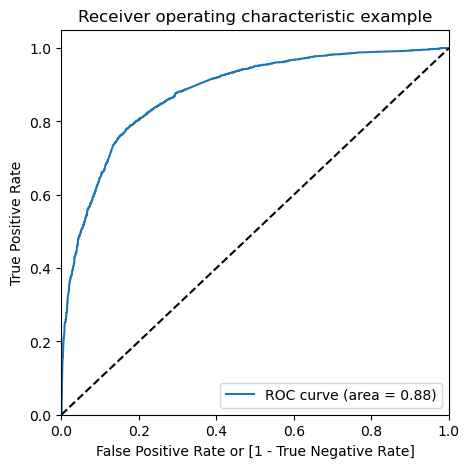

In [367]:
# Drawing ROC Curve for the train set

draw_roc(y_train_pred_final_df['Converted'] , y_train_pred_final_df['Converted prob'])

#### NOTE: Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### 9.4.1 Finding Optimal Cutoff Point/ Probability
 - It is that probability where we get balanced sensitivity and specificity

In [368]:
num = [x/10 for x in range(10)]
num

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [369]:
for i in  num :
    y_train_pred_final_df[i] = y_train_pred_final_df['Converted prob'].map(lambda x: 1 if x>i else 0)
y_train_pred_final_df.head()

,Converted,Converted prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


#### Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [370]:
cutoff_df = pd.DataFrame( columns=['prob' , 'accuracy','sensitivity','specificity' , 'precision', 'recall'])

for i in num :
    cm1  = metrics.confusion_matrix(y_train_pred_final_df['Converted'] , y_train_pred_final_df[i])
    total = sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1]) / total
    sensitivity = cm1[1,1]/(cm1[1,1] + cm1[1,0])
    specificity = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    precision   = cm1[1,1]/(cm1[1,1] + cm1[0,1])
    recall      = cm1[1,1]/(cm1[1,1] + cm1[1,0])
    
    cutoff_df.loc[i] = [i , accuracy , sensitivity , specificity , precision , recall]

print(cutoff_df)

     prob  accuracy  sensitivity  specificity  precision    recall
0.0   0.0  0.381262     1.000000     0.000000   0.381262  1.000000
0.1   0.1  0.595702     0.973642     0.362819   0.484953  0.973642
0.2   0.2  0.721243     0.920114     0.598701   0.585548  0.920114
0.3   0.3  0.791280     0.832928     0.765617   0.686497  0.832928
0.4   0.4  0.813698     0.763585     0.844578   0.751697  0.763585
0.5   0.5  0.805195     0.656934     0.896552   0.796460  0.656934
0.6   0.6  0.792981     0.585969     0.920540   0.819626  0.585969
0.7   0.7  0.779066     0.507705     0.946277   0.853442  0.507705
0.8   0.8  0.754020     0.405515     0.968766   0.888889  0.405515
0.9   0.9  0.707792     0.247364     0.991504   0.947205  0.247364


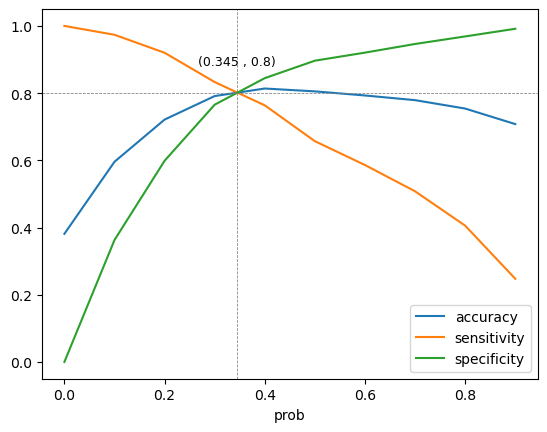

In [371]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensitivity'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['specificity'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

#### NOTE: 0.345 is the approx. point where all the curves meet, so 0.345 seems to be our Optimal cutoff point for probability threshold .

- Lets do mapping again using optimal cutoff point

In [372]:
y_train_pred_final_df['final_predcted'] = y_train_pred_final_df['Converted prob'].map(lambda x:1 if x>0.345 else 0)

y_train_pred_final_df.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"] , axis=1 , inplace=True)

y_train_pred_final_df.head()

,Converted,Converted prob,Prospect ID,final_predcted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


### 9.5 Calculating all metrics using confusion matrix for Train with final_predicted

In [373]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final_df['Converted'] , y_train_pred_final_df['final_predcted'])

0.8045763760049475

In [374]:
# UDF for all Logistic Regression Metrics

def logreg_all_metrics(actual,final_prob):
    confusion_matrix = metrics.confusion_matrix(actual , final_prob)
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]

    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print("Confusion Matrix")
    print(confusion_matrix,"\n")
    print("*"*50,"\n")
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    

In [375]:
logreg_all_metrics(y_train_pred_final_df['Converted'] , y_train_pred_final_df['final_predcted'])

Confusion Matrix
[[3230  772]
 [ 492 1974]] 

************************************************** 

True Negative                    :  3230
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  772
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.8005
Model Specificity                :  0.8071
Model Precision                  :  0.7189
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1929


#### NOTE:

- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.
- m80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

### Adding Lead Score Feature to Training dataframe
- A higher score would mean that the lead is hot, i.e. is most likely to convert.
- Whereas a lower score would mean that the lead is cold and will mostly not get converted

In [376]:
#  adding lead_Score
y_train_pred_final_df['lead_Score'] = y_train_pred_final_df['Converted prob'].map(lambda x: round(x*100))
y_train_pred_final_df.head()

,Converted,Converted prob,Prospect ID,final_predcted,lead_Score
0,0,0.474082,1871,1,47
1,0,0.073252,6795,0,7
2,0,0.249087,3516,0,25
3,0,0.768973,8105,1,77
4,0,0.212973,3934,0,21


## Step 10: Making Predictions on test set

### 10.1 Scaling Test dataset

In [377]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   int32  
 6   Lead Origin_Quick Add Form                2772 non-null   int32  
 7   Lead Source_Facebook                      2772 non-null   int32  
 8   Lead Source_Google                        2772 non-null   int32  
 9   Lead Source_Olark Chat                    2772 non-null   int32  
 10  Lead Source_Organic Search            

In [378]:
num_col = X_test.select_dtypes(include =['int64', 'float64']).columns
num_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Free_copy'],
      dtype='object')

In [379]:
X_test[num_col] = scaler.transform(X_test[num_col])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_other,Current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


### 10.2 Prediction on Test Dataset using final model

In [380]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)


In [381]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [382]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [383]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True , inplace =True)
y_test_df.reset_index(drop=True , inplace= True)

y_pred_test_final = pd.concat([y_test_df , y_test_pred] , axis=1)
y_pred_test_final.head()




,Converted,Prospect ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [385]:
# Renaming the column 
y_pred_test_final = y_pred_test_final.rename(columns={0:'Converted Prob'})

# Rearranging the columns
y_pred_test_final = y_pred_test_final.reindex(['Prospect ID','Converted','Converted Prob'] , axis=1)

y_pred_test_final.head()

,Prospect ID,Converted,Converted Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [386]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_test_final['final_predicted'] = y_pred_test_final['Converted Prob'].map(lambda x: 1 if x>0.345 else 0)
y_pred_test_final.head()

,Prospect ID,Converted,Converted Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


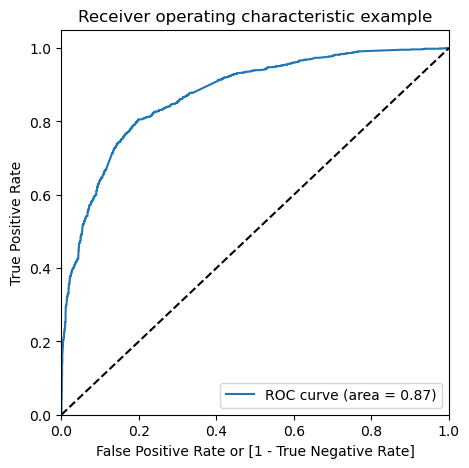

In [387]:
# Drawing ROC curve for Test Set

draw_roc(y_pred_test_final['Converted'] , y_pred_test_final['Converted Prob'])

#### NOTE:
    - Area under ROC curve is 0.87 out of 1 which indicates a good predictive model



#### NOTE:

 - Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set.
 - We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

### 10.3 Test set Model Evaluation
 - Calculating all metrics using confusion matrix for Test set

In [389]:
logreg_all_metrics(y_pred_test_final['Converted'] , y_pred_test_final['final_predicted'])

Confusion Matrix
[[1353  324]
 [ 221  874]] 

************************************************** 

True Negative                    :  1353
True Positive                    :  874
False Negative                   :  221
False Positve                    :  324
Model Accuracy                   :  0.8034
Model Sensitivity                :  0.7982
Model Specificity                :  0.8068
Model Precision                  :  0.7295
Model Recall                     :  0.7982
Model True Positive Rate (TPR)   :  0.7982
Model False Positive Rate (FPR)  :  0.1932


### NOTE: 
 - The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- For Test set
    - Accuracy : 80.34%
    - Sensitivity : 79.82% ≈ 80%
    - Specificity : 80.68%

These matrics are very close to train set, so out final model logm4 is performing with good consistency on both Train & Test set

### 10.3 Adding Lead Score Feature to Test dataframe
- A higher score would mean that the lead is hot, i.e. is most likely to convert.
- Whereas a lower score would mean that the lead is cold and will mostly not get converted

In [391]:
# Lets add Lead Score
y_pred_test_final['Lead_Score'] = y_pred_test_final['Converted Prob'].map(lambda x : round(x*100))
y_pred_test_final.head()


,Prospect ID,Converted,Converted Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87


Lead Score: Lead Score is assigned to the customers

 - The customers with a higher lead score have a higher conversion chance.
 - The customers with a lower lead score have a lower conversion chance.

## step 11 : Conclusion

### 11.1 Train - Test

#### Train Data Set:
    - Accuracy: 80.46%

    - Sensitivity: 80.05%

    - Specificity: 80.71%

#### Test Data Set:
    - Accuracy: 80.34%

    - Sensitivity: 79.82% ≈ 80%

    - Specificity: 80.68%

### 11.2 Model parameters
- The final Logistic Regression Model has 12 features


### Top 3 features that contributing positively to predicting hot leads in the model are:
    - Lead Source_Welingak Website

    - Lead Source_Reference

    - Current_occupation_Working Professional
    
  #### Note : 
  - The Optimal cutoff probability point is 0.345.Converted probability greater than 0.345 will be predicted as Converted lead (Hot lead) & probability smaller than 0.345 will be predicted as not Converted lead (Cold lead).


### 11.3 Recommendations

#### To increase our Lead Conversion Rates:
- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget/spend can be done on Welingak Website in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too.

#### To identify areas of improvement:
- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.